In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import yaml
import os
from torch import load
from gymnasium.utils.save_video import save_video
from lunar_lander import *
from moviepy import VideoFileClip

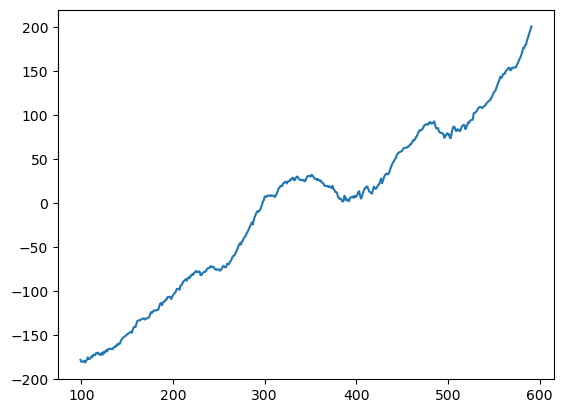

In [2]:
list_rew_ep = pickle.load(open('./artifacts/list_rew_ep.pickle', 'rb'))
plt.figure()
plt.plot(pd.Series(list_rew_ep).rolling(100).mean())

In [ ]:
def save_experience(environment, model, experience):
    state = environment.reset()
    if type(state) == tuple:
        state = state[0]
    #
    list_frame = []
    #
    terminal_state = False
    timestep = 0
    while terminal_state == False:
        frame = environment.render()
        list_frame.append(frame)
        action = model(tensor(state)).detach().numpy().argmax()
        state, _, terminal_state, _, _ = environment.step(action)
        if timestep > 800:
            break
        timestep += 1
    #
    print(experience, terminal_state, timestep, experience)
    save_video(list_frame, video_folder = 'video', name_prefix = f'experience_{experience}',
               fps = environment.metadata['render_fps'])
        
def save_simulation():
    max_experience = np.max([int(i.split('_')[1].split('.')[0]) for i in os.listdir('./artifacts/') if 'checkpoint' in i])
    for experience in [0, 100, 300, 500, max_experience]:
        env = gym.make('LunarLander-v3', render_mode = 'rgb_array')
        memory = Memory(config_model = config_model)
        agent = Agent(environment = env, memory = memory, config_model = config_model)
        #
        model = agent.model_pred.eval()
        model.load_state_dict(load(f'./artifacts/checkpoint_{experience}.pth'))
        #
        save_experience(env, model, experience)
        env.close()
    
save_simulation()

0 True 91 0
100 True 488 100
300 False 801 300


In [ ]:
for file in [file for file in os.listdir('./video') if '.mp4' in file]:
    clip = VideoFileClip(f'video/{file}')
    clip.write_gif(f'video/{file}'.replace('mp4', 'gif'), fps = 15)

MoviePy - Building file video/experience_0-episode-0.gif with imageio.


MoviePy - Building file video/experience_100-episode-0.gif with imageio.


MoviePy - Building file video/experience_300-episode-0.gif with imageio.


MoviePy - Building file video/experience_500-episode-0.gif with imageio.


MoviePy - Building file video/experience_850-episode-0.gif with imageio.
